# Постановка задачи обучения модели в Байесовском подходе

У нас есть модель с параметрами $\theta$ и переменными $x, y$. 

Что такое обучить Байесовскую модель - найти постериор, т.е распределение параметров $\theta$, при условии что мы пронаблюдали наши данные.
$$p(\theta|x, y) = \frac{p(y|x, \theta)p(\theta)}{p(x, y)} = \frac{p(y|x, \theta)p(\theta)}{\int\limits_{\theta}p(y|x, \theta)p(\theta)\mathrm d \theta} \to Posterior = \frac{Likelihood \to Prior}{Evidence}$$ 
где: $x, y$ - входы и выходы, </br>
$\theta$ - параметры модели, </br>
$p(y|x, \theta)$ - вероятность пронаблюдать такие выходы при заданных параметрах и входах (Likelihood), </br>
$p(\theta)$ - априорное распределение на параметры модели, </br>
$p(x, y)$ - вероятность пронаблюдать такие данные при любых параметрах (Evidence), </br>
$p(\theta|x, y)$ - вероятность распределения на параметры при наблюдаемых данных (Posterior)

$\displaystyle \int\limits_{\theta}p(y|x, \theta)p(\theta)\mathrm d \theta$ - называется нормализующая константа.

__Что значит обучить модель__

перепишем в терминах ML:
$$p(\theta|X_{tr}, Y_{tr}) = \frac{p(Y_{tr}|X_{tr}, \theta)p(\theta)}{\int p(Y_{tr}|X_{tr}, \theta)p(\theta) \mathrm d \theta}$$

Т.е мы ищем множетво гипотез с различными параметрами $\theta$ которые потом агрегируются с различными весами в единую модель. Фактически мы обучаем не одну модель, а ансамбль моделей.

__Получить предсказание__

У нас на входе есть новые данные $(x)$, и апостериорное распределение $p(\theta|X_{tr}, Y_{tr})$, которое мы получили при обучении модели. И мы ищем распределение на $y$ при заданных данных, фактически мы ищем мат ожидание $y$ по параметрам.
$$p(y|x, X_{tr}, Y_{tr}) = \int \limits_\theta p(y|x, \theta)p(\theta|X_{tr}, Y_{tr}) \mathrm d \theta$$

# Сэмплирование

На практике взять интеграл $\int \limits_\theta p(y|x, \theta)p(\theta|X_{tr}, Y_{tr}) \mathrm d \theta$ практически не возможно. 

В первую очерь потому что размерность пространства $\theta$ как правило велика. Велика настолько, что численные методы интегрирования не эффективны.

Если взять выборку по параметрам, взять частичную сумму и усреднить по ней - то мы получим оценку близкую к результату.

$$p(y|x, X_{tr}, Y_{tr}) \simeq \sum_{\theta_{sample}}p(y, x, \theta_{sample})p(\theta_{sample}| X_{tr}, Y_{tr})$$

Возникает вопрос - как взять выборку из распределения?

В общем виде нам необходимо оценить наш стохастический интеграл, т.е получить мат ожидание следующего вида:
$$\mathbb{E}_{p(x)}f(x) = \int{f(x)p(x)\mathrm d x}$$
как уже упомянули выше - $x$ на практике является пространством высокой размерности. 

В аналитическом виде взять данный интеграл можно в редких случаях. Такие случаи носят название "сопряженного прайера" и несколько примеров были рассмотрены на лекции - например бета-распределение.

Данный интеграл можно оценить методом Монте-Карло, следующим образом: генерируем $n$ точек из распределения $p(x)$ и берем в них значение функции $f(x)$ и затем усредняем.

$$\mathbb{E}_{p(x)}f(x) \approx \frac{1}{n}\sum_{i=1}^nf(x_i), \quad x_i \sim p(x)$$

Данная сумма дает нам приближенную оценку на интеграл.

Введем обозначения: $$J = \frac{1}{n}\sum_{i=1}^nf(x_i), \quad I = \int{f(x)p(x)\mathrm d x}, \quad \mathbb{D}_f \stackrel{\text{def}}{=} \int p(x)\big(f(x) - I \big)^2 \mathrm d x$$
Поскольку у нас сумма случайных величин - то $J$, в силу центральной предельной теоремы, распределена нормальным образом $J \sim \mathscr{N}(J|I, \frac{1}{n}\mathbb{D}_f)$

Поскольку мат ожидание равно мат ожиданию исходного интеграла, то нам просто нужно генерировать выборку достаточного размера для уменьшения дисперсии.

Второй момент который необходимо отметить, что оценка дисперсии зависит от поведения функции $f(x)$, но не зависит от размерности пространства $x$. Если функция $f(x)$ на области носителя $p(x)$ меняется плавно - то нам не нужно очень много точек, что бы получить разумную точность оценки.

Фактически для оценки этого интеграла необходимо научиться генерировать выборку из некоторого наперед заданного распределения $p(x)$.

Очевидным образом можно генерировать выборку из равномерного распределения. Так же очевидным образом на основе выборки из равномерного распределения мы можем перейти к выборке из нормального распределения. 

Так же можно получить и выборку из многомерного нормалного распределения, воспользовавшись разложением Корецкого и сведя задачу к одномерному случаю.

## Подход в общем виде:

Пусть $F(x)$ функция распределения случайной величины которая по определению есть вероятность случайной величины $X$ оказаться меньше чем $x$:  $F(x) \stackrel{\text{def}}{=} \mathbb{P}\{X<x\}$, произвольное случайное распределение. 

Тогда подставляя в это соотношение само значение случайной величины понятно, что $F(X)$ имеет равномерное распределение.

__Доказательство:__

Рассмотрим Функцию распределения на случайную величину $\mathbb{P}\{(F(X)<\eta\}$ возмем от обоих частей $F^{-1}$:
$$\mathbb{P}\{(F(X)<\eta\} = \mathbb{P}\{X<F^{-1}(\eta)\} = F\{F^{-1}(\eta)\} = \eta$$

Функция распределения какой случайной величины имеет значение равное своему аргументу на отрезке $[0, 1]$ - равномерное распределение от 0 до 1:
$$\forall X \implies F(X) \sim U[0, 1]$$

Таким образом для получения выборки величины $X$ необходимо взять выборку из равномерного распределения от 0 до 1 и взять от него $F^{-1}$.

__Проблема:__ чаще всего взять $F^{-1}$ не получится. Часто ее вообще нельзя вычислить.

### $F(x)$ - показательное распределение

$$p(x) = \lambda e^{-\lambda x}, \quad F(x) = 1-e^{-\lambda x}$$ тогда взяв обратную функцию можем получить распределение для $x$: $$x = -\frac{1}{\lambda}\ln(1-\xi)$$

генерируя $\xi$ из равномерного распределения будем получать $x$ из показательного.

### Распределение Коши

$$p(x)=\frac{1}{1+x^2}\frac{1}{\pi}, \quad F(x) = \frac{1}{2} + \frac{\arctan(x)}{\pi}, \quad F^{-1}(x) = \tan \Big( \pi \big(x-\frac{1}{2} \big)\Big)$$

Распределение Коши имеет самые тяжелые "хвосты", что позволяет использовать его в методе __Rejection sampling__ в качестве мажорирующего распределения.

При оценке методом Монте-Карло следует помнить, что неопределенность средних величин, распределенных по Коши, так же будет распределена по Коши. Таким образом семплируя и усредняя выборку мы не получим уменьшение неопределенности.

## Rejection sampling

Нам дано исходное распределение $p(x)$ из которого мы генерировать выборку в явном виде не умеем.

__Идея:__

Если мы промажерируем (покроем) наше неизвестное распределение $p(x)$ – известным $q(x)$, таким от которого можем взять обратную функцию, то сможем сделать выборку и из нашего целевого распределения $p(x)$.

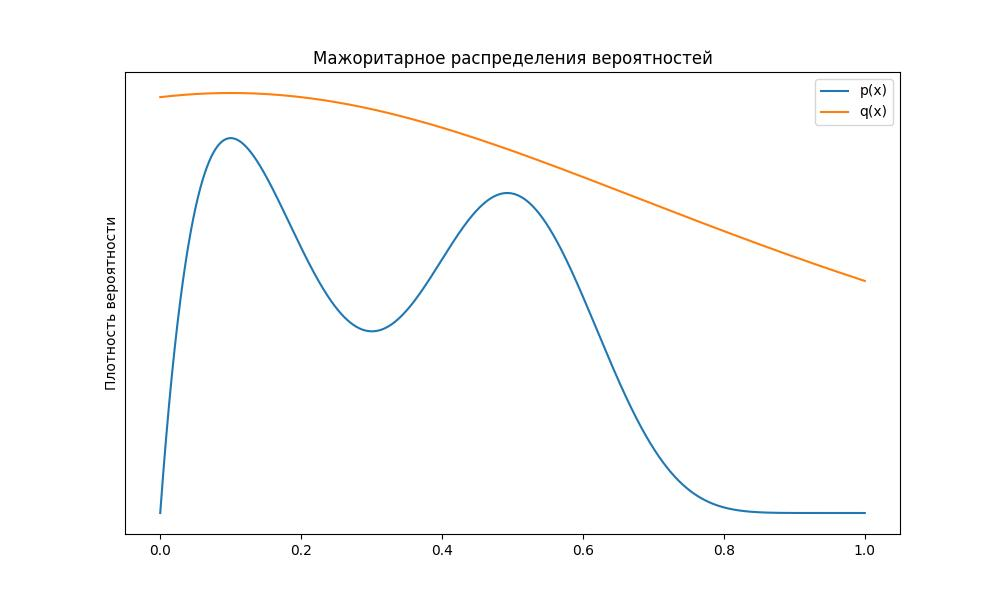

В явном виде выполнить такое условие невозможно, поскольку $\int p(x)\mathrm d x = \int q(x)\mathrm d x = 1$.

Для того что бы выполнить такое преобразование необходимо домножить $q(x)$ на некоторую констатнту и тогда возможно $\forall x: Cq(x) \geq q(x)$

Тогда алгоритм Rejection sampling можно описать в следующем виде:
1. Семплируем точку из $q(x)$: $x' \sim q(x)$
2. Генерируем $\xi$ из равномерного распределения от 0 до $Cq(x)$: $\xi \sim U[0, Cq(x')]$
3. Принимаем $x'$: если $\xi < p(x')$ иначе возвращаюсь на шаг 1. 

В результате получим выборку из нужного нам распределения $p(x)$


__Проблемы:__
1. В случае плохого совпадения распределений (как на рисунке) – метод не эффективен из-за большого числа reject’ов;

2. В случае если мы не можем промажерировать наше распределение «хорошим» – метод не работает.

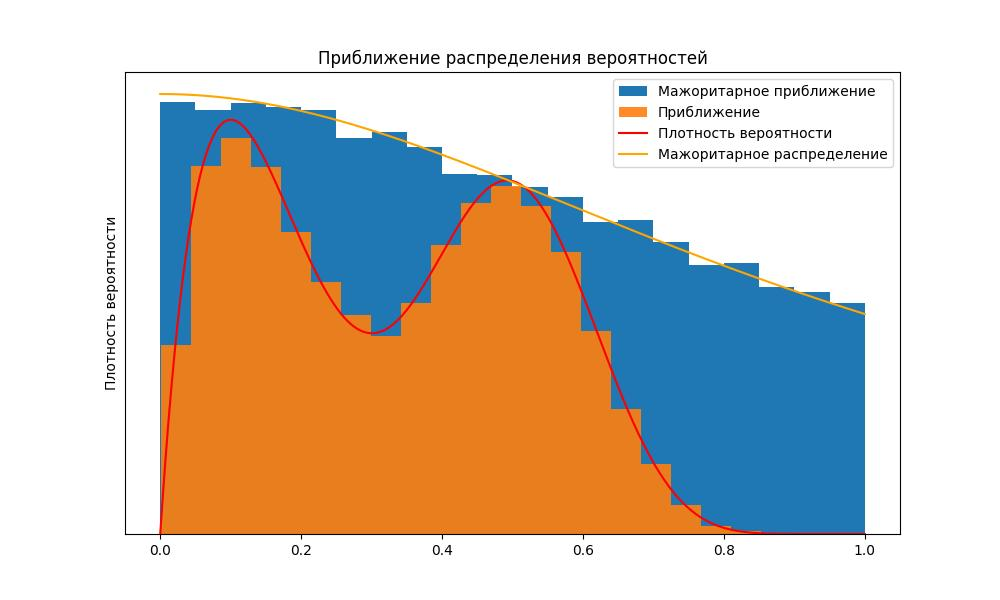

Как следствие распределение Коши может использоваться как мажерирующее для распределений симметричного вида в следствие того, что имеет самые "тяжелые" хвосты, которые гарантированно "покроют" хвосты целевого распределения.

Эффективность метода определяется соотношением площадей под распределениями $p(x)$ и $Cq(x)$: $\displaystyle \frac{\int p(x) \mathrm d x}{\int Cq(x) \mathrm d x} = \frac{1}{C} \frac{\int p(x) \mathrm d x}{\int q(x) \mathrm d x} = \frac{1}{C}$, т.е. фактически величиной костанты $C$, которая тем больше, чем менее у нас совпадают распределения.

Для повышения эффективности метода можно разбить на несколько бинов и каждый приближать равномерным распределением, на хвостах оставляя распределение Коши. Такой подход позволяет повысить эффективность метода Rejection sampling.

## Importance sampling

Исходно необходимо вычислить мат ожидание от функции $f(x)$ по распределению $p(x)$, т.е. вычислить следующий интеграл: $\displaystyle \int p(x) f(x) \mathrm d x$, но мы не умеем семплировать из $p(x)$. Тогда это эквивалентно мат ожиданию из распределения $q(x)$ (семплировать из которой мы умеем) от функции $\frac{p(x)}{q(x)} f(x)$:
$$\int p(x) f(x) \mathrm d x = \int q(x) \frac{p(x)}{q(x)} f(x)\mathrm d x$$
Тогда мы можем получить Монте-карло оценку для искомого интеграла:
$$\int q(x) \frac{p(x)}{q(x)} f(x)\mathrm d x \approx \frac{1}{n} \sum_{i=1}^n \frac{p(x_i)}{q(x_i)}f(x_i), \quad x_i \sim q(x)$$

Никаких reject'ов - сколько точек сгенерировали - столько точек и пошло в сэмплинг.

$$\mathbb{E}_{p(x)}f(x) = \frac{1}{n} \sum_{i=1}^n \frac{p(x_i)}{q(x_i)}f(x_i) = \frac{1}{n} \sum_{i=1}^n v_i f(x_i), \quad v_i = \frac{p(x_i)}{q(x_i)}$$

$v_i$ интерпретируется как "важность" сэмпла, т.е вес с которым берется значение в данной точке.

__Проблема:__

Если $v_i$ оказывается сильно неравномерные - тогда веса постоянно "скачут" и необходимо очень много сэмплов для адекватной оценки. Дисперсия не падает как $^1/_n$.

Такая ситуация характерна когда распределения $p(x)$ и $q(x)$ сильно различаются. Поскольку на распределение $q(x)$ наложено только одно условие - мы умеем из него генерировать выборку, то такая ситуация более чем вероятна. 

Фактически устранив проблему reject'ов путем взвешенной выборки мы получили проблему с весами, т.е вклад в оценку мат ожидания могут дать всего несколько точек из генерированной выборки и в результате мы получим огромную дисперсию.

Предположим, что мы знаем распределение $p(x)$ с точностью до нормировочной константы, т.е мы умеем генерировать выборку из распределения $\hat{p}(x) = \frac{1}{z}p(x)$, но не умеем этого для самого распределения $p(x)$.

Тогда: 
$$\mathbb{E}_{p(x)}f(x) = \int p(x) f(x) \mathrm d x = \int \frac{1}{z} \hat{p}(x) f(x) \mathrm d x = \frac{1}{z} \int \hat{p}(x) f(x) \mathrm d x$$
$$z = \int \hat{p}(x) \mathrm d x \implies \mathbb{E}_{p(x)}f(x) = \frac{1}{\int \hat{p}(x) \mathrm d x} \int \hat{p}(x) f(x) \mathrm d x$$

Вводя функцию $q(x)$ от которой мы умеем генерировать сэмплы, получим:
$$\mathbb{E}_{p(x)}f(x) = \frac{\int q(x) \frac{\hat{p}(x)}{q(x)}f(x)}{\int q(x) \frac{\hat{p}(x)}{q(x)}}$$
Выполним оценку Монте-Карло для числителя и знаменателя:
$$\frac{\int q(x) \frac{\hat{p}(x)}{q(x)}f(x)}{\int q(x) \frac{\hat{p}(x)}{q(x)}} = \frac{\frac{1}{n} \sum \frac{\hat{p}(x_i)}{q(x_i)}f(x_i)}{\frac{1}{n} \sum \frac{\hat{p}(x_i)}{q(x_i)}} = \sum_i w_i f(x_i), \quad w_i = \frac{ \frac{\hat{p}(x_i)}{q(x_i)}}{\sum_j \frac{\hat{p}(x_j)}{q(x_j)}}$$

Таким образом мы можем генерировать выборку из распределения, которое мы знаем с точностью до нормировочной константы.

## Марковская цепь

Последовательность случайных событий с конечным или счётным числом исходов, где вероятность наступления каждого события зависит только от состояния, достигнутого в предыдущем событии. Характеризуется тем свойством, что, говоря нестрого, при фиксированном настоящем будущее независимо от прошлого.

$$p(x_1, x_2, \dotsc, x_n) = p_n(x_n|x_{n-1})p_{n-1}(x_{n-1}|x_{n-2})\dotsc p_2(x_2|x_1)p(x_1)$$

Матрица $P_{ij}(n) = \mathbb{P}(X_{n+1}=j|X_n=i)$
называется ма́трицей перехо́дных вероя́тностей или матрицей перехода.

Рессмотрим вероятности в цепи Маркова:
$$p_2(x_2) = \int p_2(x_2|x_1)p(x_1) \mathrm d x_1$$
$$p_3(x_3) = \iint p_3(x_3|x_2)p_2(x_2|x_1)p(x_1) \mathrm d x_2 \mathrm d x_1$$
Это можно рассматривать как действие линейным оператором на $x_1$.

В случае если матрица перехода не зависит от номера шага, то такая цепь Маркова называется однородной: $p_n(x''|x') = p(x''|x'), \quad  \forall n.$

Тогда мы получаем для $p_n(x_n)$ $(n-1)$-раз действие линейным оператором на $x_1$. Если мы множество раз подействуем линейным оператором на элемент линейного пространства то через некоторое количество шагов мы сойдемся к собственному вектору.

Таким образом через некоторое количество шагов мы из исходного распределения $p_1$ перейдем в распределение $p_n$ которое дальше меняться уже не будет. К сожалению это не всегда так, но часто это условие выполняется.

__Условие стационарности:__

Если для любых $x'$ и $x''$ все условные вероятности в матрице переходов больше 0, тогда существует и единственно такое распределение $p$ к которому марковская цепь сойдется и дальше оно будет сохраняться.
$$\forall x', x'': p(x''|x') > 0 \implies \forall p(\cdot) \exists ! p_0: \int p(x_{n+1}|x_n)p_0(x_n) \mathrm d x_n = p_0(x_{n+1})$$

Таким образом, если мы построим однородную Марковскую цепь с ограницением на положительные вероятности в матрице перехода, то через некоторое число шагов мы однозначно сойдемся к стационарному распределению.

Т.е если мы построим такую Марковскую цепь, что ее стационарное распределение будет нашим искомым распределением - то мы сможем семплировать из него любую выборку.

__Как найти стационарное состояние:__

Стационарное распределение есть собственный вектор матрицы переходов с собственным значением $\lambda = 1$. 

На практике это нам мало поможет, из-за вычислительной сложности.

__Уравнение детального баланса__

Марковская цепь удовлетворяет условию детального баланса для распределения $r(x)$, если справедливо условие: $$\forall x, y: p(x|y)r(y) = p(y|x)r(x)$$ или в дискретных величинах, если $\pi_i$ - состояние, $P_{ij}$ - матрица переходов, тогда: $$\pi_i P_{ij} = \pi_j P_{ji}$$

Причем, если Марковская цепь однородна, все вероятности в матрице переходов больше 0 и для нее выполняется условие детального баланса, то $r(x)$ и есть стационарное распределение для этой Марковской цепи.

Как можно __интерпретировать уравниение детального баланса__: предположим, что $x$ и $y$ это страны, а $r(x)$ это ВВП страны. Тогда вероятность $p(x|y)$ можно интерпретировать как долю ВВП которую страна $x$ вкладывает в страну $y$, а их произведедние это получается просто финансовый поток. В том случае если потоки равны между странами - тогда система находится в равновесии - т.е в балансе.

## Алгоритм Метрополиса-Гастингса

Алгоритм Метрополиса-Гастингса задает правило по которому можно построить Марковскую цепь с заданным стационарным распределением.

__Задача:__ необходимо генерировать выборку из распределения $\hat{p}(x)$ которое нам известно с точностью до нормировочной константы.

Возьмем распределение $q(x'|x) > 0, \forall x$. Это распределение будем называть __proposal distribution__. 

__Алгоритм Метрополиса-Гастингса__

1. Выбираем произвольное начальное значение $x_0$
2. Генерируем точку $y \sim q(y|x)$
3. Выбираем точку $x_{n+1}$ в соотвествии с правилом: $$
x_{n+1} =
  \begin{cases}
    y_n  \quad \text{c вероятностью}: \min \Big(1, \frac{\hat{p}(y)q(x_n|y)}{\hat{p}(x_n)q(y|x_n)} \Big) \\
    x_n \quad \text{в остальных случаях}
  \end{cases}$$
  
Выборка $x_n$ по такому правилу через некоторое число шагов будет выдавать значения в соответствии с распределением $\hat{p}(x)$.

__Cмысл схемы__

Proposal distribution генерирует кандидата на следующую точку $y$. Мы эту точку принимаем, если значение плотности в новой точке оказалось выше чем в старой, а если нет - то принимаем с некоторой вероятностью.

Если бы мы принимали только в сторону увеличения плотности, тогда мы бы сошлись к моде распределения и больше оттуда никуда не двинулись. А поскольку нам нужны сэмплы из распределения, то необходимо блуждать по распределению генерируя точки из его разных частей.

__Недостатки:__ из-за того, что выборки коррелированы, эффективный размер выборки уменьшается, и иногда методы могут не сходиться или сходиться очень медленно.

## Неявное вероятностное моделирование

Подход объединяющий лучшее из вариационного оценивания и случайного сэмплирования.
В данный момент этот подход еще предмет научного обсуждения в статьях, но есть надежда, что даст более точный и продуктивный метод.